# Battle of the Neighborhoods - Where to open a new Bicycle Shop?

This project will look at neighborhoods in central Raleigh (inside the beltline) to determine the best neighborhood to open a new bicycle shop that can easily serve a neighborhood on bike, foot, or by car.

The project uses Foursquare to get find bike shop venues that already exist in town.  It also uses Foursquare to get information of universities and colleges which are higher population areas that might provide additional input when choosing a location. 

The project needs data for the neighborhoods in Raleigh.  This data is mainly scraped from https://www.city-data.com/neighborhood for each neighborhood. https://en.wikipedia.org/wiki/Raleigh,_North_Carolina_neighborhoods also provided good information on the neighborhoods inside the beltline. 

The premise for gathering the data is that a bike shop draws a lot of business from the neighborhood when there is a dense population and good foot traffic.

### Import the needed libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# TODO #mpl.style.use('ggplot') # optional: for ggplot-like style


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
# TODO from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library
import html

print('Folium installed')
print('Libraries imported.')
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 8.1 MB/s  eta 0:00:01
  Created wheel for folium: file

# Part 1: Gather Foursquare data

## Gather information on bicycle shops. 

In [2]:
# The code was removed by Watson Studio for sharing.

Start with the Raleigh NC geo coordinates: https://www.latlong.net/place/raleigh-nc-usa-7275.html

In [3]:
latitude = 35.787743
longitude = -78.644257
print(latitude, longitude)

35.787743 -78.644257


Search for bike shops shops within a 15000 meter (9.3 mile) radius of the center of the city.

In [4]:
search_query1 = 'bike bicycle'
radius = 15000

Foursquare URL to search bike shops in Raleigh NC.

In [5]:
bikeShopsUrl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query1, radius, LIMIT)
bikeShopsUrl

'https://api.foursquare.com/v2/venues/search?client_id=JXFNYM2OYSL5JDI0AZF5PCFN1GEPUAQXOSFDIXR2BBLCXP1B&client_secret=3T14NXJPTUOLJGSSSD0XMAEF25KNAOBRGSPPHGWTURHCH4LD&ll=35.787743,-78.644257&oauth_token=U3GO210XXLY2ATDZY0XTTR4LPBMSE5KAGXBMEOWRWVETKV1E&v=20180605&query=bike bicycle&radius=15000&limit=100'

Run the bike shop query

In [6]:
bikeShopResults = requests.get(bikeShopsUrl).json()
#bikeShopResults

Get the bike shop venues from the JSON response and transform into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues
bikeShopsVenues = bikeShopResults['response']['venues']

# tranform venues into a dataframe
bikeShopsDF = json_normalize(bikeShopsVenues)
bikeShopsDF.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,55f43f90498e1506d7852077,Trek Bicycle Raleigh Holly Park,"[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",v-1626303248,False,"3020 Wake Forest Road, Suite 100",35.823378,-78.620166,"[{'label': 'display', 'lat': 35.82337800000000...",4523,27609,US,Raleigh,NC,United States,"[3020 Wake Forest Road, Suite 100, Raleigh, NC...",NaN,NaN
1,5172e02d498efc18b4e4e5ab,1304 Bikes,"[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",v-1626303248,False,West Street,35.789784,-78.640824,"[{'label': 'display', 'lat': 35.78978426361667...",384,NaN,US,Raleigh,NC,United States,"[West Street, Raleigh, NC]",NaN,NaN
2,4e7de61e775b53d25b78af2b,Bikefest,"[{'id': '4bf58dd8d48988d11a941735', 'name': 'O...",v-1626303248,False,NaN,35.765594,-78.649307,"[{'label': 'display', 'lat': 35.76559381450462...",2507,NaN,US,NaN,North Carolina,United States,[North Carolina],NaN,NaN
3,5008a45ee4b008cd499f9e05,Thomas' Bike Barn,"[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",v-1626303248,False,NaN,35.793932,-78.663984,"[{'label': 'display', 'lat': 35.793932, 'lng':...",1909,27607,US,Raleigh,NC,United States,"[Raleigh, NC 27607]",NaN,NaN
4,4fe9da0fe4b043efa9b3ae22,Ted's Bike,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",v-1626303248,False,NaN,35.809034,-78.636053,"[{'label': 'display', 'lat': 35.80903435380847...",2483,27608,US,Raleigh,NC,United States,"[Raleigh, NC 27608]",NaN,NaN


Define information of interest such as the name, category, and location data and filter the dataframe

In [8]:
# keep only columns that include venue name, venue category, and all location data
filtered_columns = ['name', 'categories'] + [col for col in bikeShopsDF.columns if col.startswith('location.')] + ['id']

bikeShopsDF_filtered = bikeShopsDF.loc[:, filtered_columns]

# function that extracts the category name from the categories JSON 
def get_category_name(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
bikeShopsDF_filtered['categories'] = bikeShopsDF_filtered.apply(get_category_name, axis=1)

# clean column names by keeping only last term - remove "location."
bikeShopsDF_filtered.columns = [column.split('.')[-1] for column in bikeShopsDF_filtered.columns]

bikeShopsDF_filtered


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Trek Bicycle Raleigh Holly Park,Bike Shop,"3020 Wake Forest Road, Suite 100",35.823378,-78.620166,"[{'label': 'display', 'lat': 35.82337800000000...",4523,27609,US,Raleigh,NC,United States,"[3020 Wake Forest Road, Suite 100, Raleigh, NC...",NaN,55f43f90498e1506d7852077
1,1304 Bikes,Bike Shop,West Street,35.789784,-78.640824,"[{'label': 'display', 'lat': 35.78978426361667...",384,NaN,US,Raleigh,NC,United States,"[West Street, Raleigh, NC]",NaN,5172e02d498efc18b4e4e5ab
2,Bikefest,Other Nightlife,NaN,35.765594,-78.649307,"[{'label': 'display', 'lat': 35.76559381450462...",2507,NaN,US,NaN,North Carolina,United States,[North Carolina],NaN,4e7de61e775b53d25b78af2b
3,Thomas' Bike Barn,Bike Shop,NaN,35.793932,-78.663984,"[{'label': 'display', 'lat': 35.793932, 'lng':...",1909,27607,US,Raleigh,NC,United States,"[Raleigh, NC 27607]",NaN,5008a45ee4b008cd499f9e05
4,Ted's Bike,Road,NaN,35.809034,-78.636053,"[{'label': 'display', 'lat': 35.80903435380847...",2483,27608,US,Raleigh,NC,United States,"[Raleigh, NC 27608]",NaN,4fe9da0fe4b043efa9b3ae22
5,All-Star Bike Shop,Bike Shop,1218 Ridge Rd,35.802695,-78.686878,"[{'label': 'display', 'lat': 35.80269513824501...",4192,27607,US,Raleigh,NC,United States,"[1218 Ridge Rd, Raleigh, NC 27607]",NaN,4bc209d74cdfc9b6e66a9521
6,Triangle Spokes Group Bike Assembly,Bike Shop,New Been Avenue,35.778899,-78.604824,"[{'label': 'display', 'lat': 35.77889903308817...",3694,27610,US,Raleigh,NC,United States,"[New Been Avenue, Raleigh, NC 27610]",NaN,4edfa3c293ad7f74f8e7de54
7,The Bike Rack,Public Art,Seaboard Ave,35.878349,-78.595955,"[{'label': 'display', 'lat': 35.87834941346806...",10987,NaN,US,Raleigh,NC,United States,"[Seaboard Ave (Seaboard Station Drive), Raleig...",Seaboard Station Drive,4e521dce18a86770c5801bc5
8,"NCS Bike Night Meetup (""The Sign"")",Scenic Lookout,NaN,35.794690,-78.706944,"[{'label': 'display', 'lat': 35.79469, 'lng': ...",5713,NaN,US,Raleigh,NC,United States,"[Raleigh, NC]",NaN,51c3865c498e9b0bd8a00cca
9,All-Star Bike Shop,Bike Shop,5011 Falls of Neuse Rd Ste A,35.849268,-78.615377,"[{'label': 'display', 'lat': 35.84926846337056...",7328,27609,US,Raleigh,NC,United States,"[5011 Falls of Neuse Rd Ste A, Raleigh, NC 27609]",NaN,4bf3d6e86ba2b7135c308977


Delete the rows that are not in the Bike Shop category

In [9]:
# Get indexes where categories column is not "Bike Shop"
indicesToDrop = bikeShopsDF_filtered[bikeShopsDF_filtered['categories'] != 'Bike Shop'].index

# Delete these row indexes from dataFrame
bikeShopsDF_filtered.drop(indicesToDrop , inplace=True)
bikeShopsDF_filtered.reset_index(drop=True, inplace=True)
bikeShopsDF_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Trek Bicycle Raleigh Holly Park,Bike Shop,"3020 Wake Forest Road, Suite 100",35.823378,-78.620166,"[{'label': 'display', 'lat': 35.82337800000000...",4523,27609,US,Raleigh,NC,United States,"[3020 Wake Forest Road, Suite 100, Raleigh, NC...",NaN,55f43f90498e1506d7852077
1,1304 Bikes,Bike Shop,West Street,35.789784,-78.640824,"[{'label': 'display', 'lat': 35.78978426361667...",384,NaN,US,Raleigh,NC,United States,"[West Street, Raleigh, NC]",NaN,5172e02d498efc18b4e4e5ab
2,Thomas' Bike Barn,Bike Shop,NaN,35.793932,-78.663984,"[{'label': 'display', 'lat': 35.793932, 'lng':...",1909,27607,US,Raleigh,NC,United States,"[Raleigh, NC 27607]",NaN,5008a45ee4b008cd499f9e05
3,All-Star Bike Shop,Bike Shop,1218 Ridge Rd,35.802695,-78.686878,"[{'label': 'display', 'lat': 35.80269513824501...",4192,27607,US,Raleigh,NC,United States,"[1218 Ridge Rd, Raleigh, NC 27607]",NaN,4bc209d74cdfc9b6e66a9521
4,Triangle Spokes Group Bike Assembly,Bike Shop,New Been Avenue,35.778899,-78.604824,"[{'label': 'display', 'lat': 35.77889903308817...",3694,27610,US,Raleigh,NC,United States,"[New Been Avenue, Raleigh, NC 27610]",NaN,4edfa3c293ad7f74f8e7de54
5,All-Star Bike Shop,Bike Shop,5011 Falls of Neuse Rd Ste A,35.849268,-78.615377,"[{'label': 'display', 'lat': 35.84926846337056...",7328,27609,US,Raleigh,NC,United States,"[5011 Falls of Neuse Rd Ste A, Raleigh, NC 27609]",NaN,4bf3d6e86ba2b7135c308977
6,Performance Bicycle,Bike Shop,"653 Cary Towne Blvd., Village Square Shopping ...",35.776773,-78.766895,"[{'label': 'display', 'lat': 35.776773, 'lng':...",11142,27511,US,Cary,NC,United States,"[653 Cary Towne Blvd., Village Square Shopping...",in Village Square Shopping Center,4ae367dcf964a520a09421e3
7,The Bicycle Chain - Raleigh,Bike Shop,9000 Glenwood Ave,35.893055,-78.752756,"[{'label': 'display', 'lat': 35.89305483435493...",15274,27617,US,Raleigh,NC,United States,"[9000 Glenwood Ave, Raleigh, NC 27617]",NaN,4b674c01f964a5207f462be3
8,Performance Bicycle,Bike Shop,"6325 Falls of Neuse Road, Sutton Square Shoppi...",35.868889,-78.622994,"[{'label': 'display', 'lat': 35.8688894, 'lng'...",9234,27615,US,NE Raleigh,NC,United States,"[6325 Falls of Neuse Road, Sutton Square Shopp...",Falls of Neuse Rd. & Spring Forest Rd.,4c0902c9a1b32d7f2dde96f0
9,All Star Bike Shop,Bike Shop,1241 Kildaire Farm Rd,35.762816,-78.782546,"[{'label': 'display', 'lat': 35.76281565434125...",12794,27511,US,Cary,NC,United States,"[1241 Kildaire Farm Rd, Cary, NC 27511]",NaN,4bccc5a5cc8cd13a578cc1cf


Some of the data looks like the data has been mis-labeled as far as location and is in Vermont.  Delete anything that is not in Raleigh

In [10]:
# Get indexes where city column is not "Raleigh"
indicesToDrop = bikeShopsDF_filtered[bikeShopsDF_filtered['city'] != 'Raleigh'].index

# Delete these row indexes from dataFrame
bikeShopsDF_filtered.drop(indicesToDrop , inplace=True)
bikeShopsDF_filtered.reset_index(drop=True, inplace=True)
bikeShopsDF_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Trek Bicycle Raleigh Holly Park,Bike Shop,"3020 Wake Forest Road, Suite 100",35.823378,-78.620166,"[{'label': 'display', 'lat': 35.82337800000000...",4523,27609,US,Raleigh,NC,United States,"[3020 Wake Forest Road, Suite 100, Raleigh, NC...",NaN,55f43f90498e1506d7852077
1,1304 Bikes,Bike Shop,West Street,35.789784,-78.640824,"[{'label': 'display', 'lat': 35.78978426361667...",384,NaN,US,Raleigh,NC,United States,"[West Street, Raleigh, NC]",NaN,5172e02d498efc18b4e4e5ab
2,Thomas' Bike Barn,Bike Shop,NaN,35.793932,-78.663984,"[{'label': 'display', 'lat': 35.793932, 'lng':...",1909,27607,US,Raleigh,NC,United States,"[Raleigh, NC 27607]",NaN,5008a45ee4b008cd499f9e05
3,All-Star Bike Shop,Bike Shop,1218 Ridge Rd,35.802695,-78.686878,"[{'label': 'display', 'lat': 35.80269513824501...",4192,27607,US,Raleigh,NC,United States,"[1218 Ridge Rd, Raleigh, NC 27607]",NaN,4bc209d74cdfc9b6e66a9521
4,Triangle Spokes Group Bike Assembly,Bike Shop,New Been Avenue,35.778899,-78.604824,"[{'label': 'display', 'lat': 35.77889903308817...",3694,27610,US,Raleigh,NC,United States,"[New Been Avenue, Raleigh, NC 27610]",NaN,4edfa3c293ad7f74f8e7de54
5,All-Star Bike Shop,Bike Shop,5011 Falls of Neuse Rd Ste A,35.849268,-78.615377,"[{'label': 'display', 'lat': 35.84926846337056...",7328,27609,US,Raleigh,NC,United States,"[5011 Falls of Neuse Rd Ste A, Raleigh, NC 27609]",NaN,4bf3d6e86ba2b7135c308977
6,The Bicycle Chain - Raleigh,Bike Shop,9000 Glenwood Ave,35.893055,-78.752756,"[{'label': 'display', 'lat': 35.89305483435493...",15274,27617,US,Raleigh,NC,United States,"[9000 Glenwood Ave, Raleigh, NC 27617]",NaN,4b674c01f964a5207f462be3
7,TLC For Bikes,Bike Shop,8480 Honeycutt Rd #126,35.895471,-78.621202,"[{'label': 'display', 'lat': 35.89547131729587...",12171,27615,US,Raleigh,NC,United States,[8480 Honeycutt Rd #126 (Falls Of Neuse Rd At ...,Falls Of Neuse Rd At Honeycutt Rd,51ed7046498e36059fdb557c
8,Trek Bicycles of Raleigh,Bike Shop,10911 Raven Ridge Rd #107,35.906449,-78.591238,"[{'label': 'entrance', 'lat': 35.906495, 'lng'...",14053,27614,US,Raleigh,NC,United States,[10911 Raven Ridge Rd #107 (Durant Rd. & Raven...,Durant Rd. & Raven Ridge Rd.,51aa52467dd2d73fd5cfa68d


Create map of Raleigh. Show the city center with a red dot and show the bike shops with a blue dot. 

In [12]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the center of Raleigh

# add a red circle marker to represent the center of Raleigh
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Downtown Raleigh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the bike shops as blue circle markers
for lat, lng, label in zip(bikeShopsDF_filtered.lat, bikeShopsDF_filtered.lng, bikeShopsDF_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=html.escape(label),
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map



## Gather data on universities in the area

Search for universities and colleges since there are a number of universities in Raleigh and these might represent higher population areas not included in the neighborhood statistics.

In [13]:
search_university = 'college university'
universityUrl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_university, radius, LIMIT)
universityUrl

'https://api.foursquare.com/v2/venues/search?client_id=JXFNYM2OYSL5JDI0AZF5PCFN1GEPUAQXOSFDIXR2BBLCXP1B&client_secret=3T14NXJPTUOLJGSSSD0XMAEF25KNAOBRGSPPHGWTURHCH4LD&ll=35.787743,-78.644257&oauth_token=U3GO210XXLY2ATDZY0XTTR4LPBMSE5KAGXBMEOWRWVETKV1E&v=20180605&query=college university&radius=15000&limit=100'

Run the university query

In [14]:
universityResults = requests.get(universityUrl).json()
#universityResults

Get the univerisity venues from the JSON response and transform into a pandas dataframe

In [15]:
# assign relevant part of JSON to venues
universityVenues = universityResults['response']['venues']

# tranform venues into a dataframe
universityDF = json_normalize(universityVenues)
universityDF.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4aff082bf964a520423322e3,William Peace University (Peace College),"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1626303697,False,15 E Peace St,at N Blount St,35.789109,-78.636518,"[{'label': 'display', 'lat': 35.78910871456477...",715,27604,US,Raleigh,NC,United States,"[15 E Peace St (at N Blount St), Raleigh, NC 2...",NaN,NaN
1,4f0b7883e4b013ee942cbef4,Main Dorm William Peace University (Peace Coll...,"[{'id': '4bf58dd8d48988d1a3941735', 'name': 'C...",v-1626303697,False,"15 E Peace St, Peace College, Raleigh, NC 27604",NaN,35.789175,-78.637678,"[{'label': 'display', 'lat': 35.78917510908575...",615,27604,US,Raleigh,NC,United States,"[15 E Peace St, Peace College, Raleigh, NC 276...",NaN,NaN
2,4db86d101e7206c23d08005d,College Fencing Studio,"[{'id': '4bf58dd8d48988d1b2941735', 'name': 'C...",v-1626303697,False,NaN,NaN,35.790110,-78.637394,"[{'label': 'display', 'lat': 35.79010953685469...",673,NaN,US,Raleigh,NC,United States,"[Raleigh, NC]",NaN,NaN
3,4ddbf473922e7c4b28a5237d,Peace College CAT Bus Stop,"[{'id': '4bf58dd8d48988d1fe931735', 'name': 'B...",v-1626303697,False,Peace St at Wilmington,NaN,35.787984,-78.637722,"[{'label': 'display', 'lat': 35.787984, 'lng':...",590,NaN,US,Raleigh,NC,United States,"[Peace St at Wilmington, Raleigh, NC]",NaN,NaN
4,4d9b4fd1674ca1431121d043,College Paint & Body Shop Inc.,"[{'id': '4bf58dd8d48988d124951735', 'name': 'A...",v-1626303697,False,1022 S Saunders St,NaN,35.768081,-78.649163,"[{'label': 'display', 'lat': 35.768081, 'lng':...",2233,27603,US,Raleigh,NC,United States,"[1022 S Saunders St, Raleigh, NC 27603]",130563806,NaN


In [16]:
# keep only columns that include venue name, venue category, and all location data
university_filtered_columns = ['name', 'categories'] + [col for col in universityDF.columns if col.startswith('location.')] + ['id']
universityDF_filtered = universityDF.loc[:, university_filtered_columns]

# filter the category for each row
universityDF_filtered['categories'] = universityDF_filtered.apply(get_category_name, axis=1)

# clean column names by keeping only last term - remove "location."
universityDF_filtered.columns = [column.split('.')[-1] for column in universityDF_filtered.columns]
universityDF_filtered


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,William Peace University (Peace College),University,15 E Peace St,at N Blount St,35.789109,-78.636518,"[{'label': 'display', 'lat': 35.78910871456477...",715,27604,US,Raleigh,NC,United States,"[15 E Peace St (at N Blount St), Raleigh, NC 2...",NaN,4aff082bf964a520423322e3
1,Main Dorm William Peace University (Peace Coll...,College Residence Hall,"15 E Peace St, Peace College, Raleigh, NC 27604",NaN,35.789175,-78.637678,"[{'label': 'display', 'lat': 35.78917510908575...",615,27604,US,Raleigh,NC,United States,"[15 E Peace St, Peace College, Raleigh, NC 276...",NaN,4f0b7883e4b013ee942cbef4
2,College Fencing Studio,College Gym,NaN,NaN,35.790110,-78.637394,"[{'label': 'display', 'lat': 35.79010953685469...",673,NaN,US,Raleigh,NC,United States,"[Raleigh, NC]",NaN,4db86d101e7206c23d08005d
3,Peace College CAT Bus Stop,Bus Station,Peace St at Wilmington,NaN,35.787984,-78.637722,"[{'label': 'display', 'lat': 35.787984, 'lng':...",590,NaN,US,Raleigh,NC,United States,"[Peace St at Wilmington, Raleigh, NC]",NaN,4ddbf473922e7c4b28a5237d
4,College Paint & Body Shop Inc.,Automotive Shop,1022 S Saunders St,NaN,35.768081,-78.649163,"[{'label': 'display', 'lat': 35.768081, 'lng':...",2233,27603,US,Raleigh,NC,United States,"[1022 S Saunders St, Raleigh, NC 27603]",NaN,4d9b4fd1674ca1431121d043
5,William Peace University Fountain,General College & University,15 E Peace St,NaN,35.788803,-78.637696,"[{'label': 'display', 'lat': 35.78880266372348...",604,27604,US,Raleigh,NC,United States,"[15 E Peace St, Raleigh, NC 27604]",NaN,4bc5c4714a9aa5935ede067b
6,College Beverage,Smoke Shop,3006 Hillsborough St,NaN,35.789746,-78.676486,"[{'label': 'display', 'lat': 35.78974608307359...",2918,27607,US,Raleigh,NC,United States,"[3006 Hillsborough St, Raleigh, NC 27607]",NaN,4bce7752c564ef3b5f6eeef0
7,St. Augustine's University,University,1315 Oakwood Ave,btwn. N. State St. & Hill St.,35.786320,-78.620016,"[{'label': 'display', 'lat': 35.78632026430733...",2194,27610,US,Raleigh,NC,United States,[1315 Oakwood Ave (btwn. N. State St. & Hill S...,NaN,4be566dacf200f470f22133c
8,City of Raleigh,City,NaN,NaN,35.782728,-78.639450,"[{'label': 'display', 'lat': 35.78272773960339...",707,27601,US,NaN,North Carolina,United States,[NC 27601],NaN,4c35544d16adc9280bbcc69c
9,Kenan Recital Hall,College Auditorium,William Peace University,NaN,35.788358,-78.638126,"[{'label': 'display', 'lat': 35.78835796474561...",557,27604,US,Raleigh,NC,United States,"[William Peace University, Raleigh, NC 27604]",NaN,4ca556a0a6e08cfaac9c7094


There is so much extraneous data here. Let's look at all the unique categories and decide which we want to keep.

In [17]:
uniqueCategories = universityDF_filtered['categories'].unique()
uniqueCategories

array(['University', 'College Residence Hall', 'College Gym',
       'Bus Station', 'Automotive Shop', 'General College & University',
       'Smoke Shop', 'City', 'College Auditorium',
       'Residential Building (Apartment / Condo)', 'Medical School',
       'Salon / Barbershop', 'College Library', 'College Arts Building',
       'Neighborhood', 'College Quad', 'College Academic Building',
       'Post Office', 'Government Building', 'Water Park',
       'College Bookstore', 'High School', 'College Track', 'Garden',
       'College Administrative Building', 'Music School',
       'College Communications Building', 'College Cafeteria',
       'College Classroom', 'Cosmetics Shop', 'Club House'], dtype=object)

From all these categories of information, we are only interested in 'University' and 'General College & University'

In [18]:
# Get indexes where categories column is not 'University' and 'General College & University'
categoriesToKeep = ['University', 'General College & University']

# Get indexes where categories column is not 'University' or 'General College & University'
universityIndicesToDrop = universityDF_filtered[~universityDF_filtered['categories'].isin(categoriesToKeep)].index
universityIndicesToDrop

Int64Index([ 1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20,
            21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 45, 47, 48, 49],
           dtype='int64')

Drop the other university venues that are not of interest.

In [19]:
# Delete these row indexes from the dataframe
universityDF_filtered.drop(universityIndicesToDrop , inplace=True)
universityDF_filtered.reset_index(drop=True, inplace=True)
universityDF_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,William Peace University (Peace College),University,15 E Peace St,at N Blount St,35.789109,-78.636518,"[{'label': 'display', 'lat': 35.78910871456477...",715,27604,US,Raleigh,NC,United States,"[15 E Peace St (at N Blount St), Raleigh, NC 2...",NaN,4aff082bf964a520423322e3
1,William Peace University Fountain,General College & University,15 E Peace St,NaN,35.788803,-78.637696,"[{'label': 'display', 'lat': 35.78880266372348...",604,27604,US,Raleigh,NC,United States,"[15 E Peace St, Raleigh, NC 27604]",NaN,4bc5c4714a9aa5935ede067b
2,St. Augustine's University,University,1315 Oakwood Ave,btwn. N. State St. & Hill St.,35.786320,-78.620016,"[{'label': 'display', 'lat': 35.78632026430733...",2194,27610,US,Raleigh,NC,United States,[1315 Oakwood Ave (btwn. N. State St. & Hill S...,NaN,4be566dacf200f470f22133c
3,North Carolina State University,University,4700 Hillsborough St,at Dan Allen Dr,35.785167,-78.674995,"[{'label': 'display', 'lat': 35.7851667877948,...",2790,27606,US,Raleigh,NC,United States,"[4700 Hillsborough St (at Dan Allen Dr), Ralei...",NaN,4c52fae199ecc9b6647ca35b
4,Shaw University,General College & University,118 E South St,NaN,35.770772,-78.637522,"[{'label': 'display', 'lat': 35.77077179358403...",1984,27601,US,Raleigh,NC,United States,"[118 E South St, Raleigh, NC 27601]",NaN,4c6db8c44d24b60c44c2d6d8
5,peace college beach,University,NaN,NaN,35.790500,-78.636929,"[{'label': 'display', 'lat': 35.7905, 'lng': -...",729,27604,US,Raleigh,NC,United States,"[Raleigh, NC 27604]",NaN,4f9c7be1e4b0d8e622d2bc49
6,Parkford University,General College & University,2 Hannover Sq,NaN,35.774235,-78.639359,"[{'label': 'display', 'lat': 35.77423477172851...",1567,27601,US,Raleigh,NC,United States,"[2 Hannover Sq, Raleigh, NC 27601]",NaN,5a17d2e286f4cc016d737357


Add the universities to the map

In [27]:
# add the Universities as purple circle markers
for lat, lng, label in zip(universityDF_filtered.lat, universityDF_filtered.lng, universityDF_filtered.name ):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='purple',
        popup=html.escape(label),
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

It looks like there are already some strategically placed bike shops.

# Part 2: Gather Neighborhood Data

Finding the data is the challenging part of the problem. I am using a city where I don't already have neighborhood data.  As I searched, much of the data I was interested in was not free. I found statistics that I was interested in at https://www.city-data.com/neighborhood/, so I am going to scrape the data I am interested in using beautifulsoup. 

Let's look at a neighborhood as an example.

In [32]:
# first page to load
neighborhood_page = "https://www.city-data.com/neighborhood/Capital-Park-Raleigh-NC.html";

# Get the html page
neighborhood_data = requests.get(neighborhood_page);

# response code 200 means the data was read OK
print(neighborhood_page)

https://www.city-data.com/neighborhood/Capital-Park-Raleigh-NC.html


In [33]:
soup = BeautifulSoup(neighborhood_data.text);

content_type_list = soup.find_all(class_='content-item row');
#content_type_list

Define a method that can parse any of the neighborhood pages to look for the following statistics:
- Area
- Population
- Density
- Median income
- Average household size

In [34]:
def create_neighborhoodDF(neighborhood_page, debug):
    
    # Get the html page
    neighborhood_data = requests.get(neighborhood_page);
    
    soup = BeautifulSoup(neighborhood_data.text);
    content_type_list = soup.find_all(class_='content-item row');

    neighborhoodName = ""
    area = ""
    population = ""
    populationPerSquareMile = ""
    medianIncome = ""
    averageHouseholdSize = ""

    for neighborhoodData in content_type_list:

        #print(len(neighborhoodData.contents))
        #for i in neighborhoodData.contents :
        #    print(i)
        
        for index, line in enumerate(neighborhoodData.contents):
            #print(line)
            if ("Area:" in str(line)) :           
                area = str(neighborhoodData.contents[index+1]).strip()

            if ("Population:" in str(line)) :
                population = str(neighborhoodData.contents[index+1]).strip();
            
            if ("Population density:" in str(line)) :
                allTD = neighborhoodData.contents[index+2].findAll('td')
                neighborhoodName = allTD[0].contents[0].text.strip(':')
                populationPerSquareMile = str(allTD[1].contents[1]).strip()

            if ("Median household income in 2019:" in str(line)) :
                medianIncome = neighborhoodData.contents[index+3].findAll('td')[1].contents[1]
                
            if ("Average household size:" in str(line)) :
                averageHouseholdSize = str(neighborhoodData.contents[index+2].findAll('td')[1].contents[1]).strip()
                if averageHouseholdSize.endswith(' people') : 
                    averageHouseholdSize = averageHouseholdSize[: -len(' people')]


    # 
    if debug :
        print("Neighborhood Name:")
        print(neighborhoodName)
        print("Area:")
        print(area)
        print("Population:")
        print(population)
        print("Population density:")
        print(populationPerSquareMile)
        print("Median household income:")
        print(medianIncome)
        print("Average household size:")
        print(averageHouseholdSize)

    data = {'neighborhood': [neighborhoodName], 'population': [population], 'area': [area], 'density': [populationPerSquareMile], 'median income': [medianIncome], 'average household size': [averageHouseholdSize]}
    df = pd.DataFrame(data)
    return df
    

In [35]:
neighborhoodDF = create_neighborhoodDF('https://www.city-data.com/neighborhood/Capital-Park-Raleigh-NC.html', True)
neighborhoodDF

Neighborhood Name:
Capital Park
Area:
0.014
Population:
96
Population density:
6,734
Median household income:
$66,125
Average household size:
2.0


,neighborhood,population,area,density,median income,average household size
0,Capital Park,96,0.014,"6,734","$66,125",2.0


Using data from https://en.wikipedia.org/wiki/Raleigh,_North_Carolina_neighborhoods, I gathered information of the neighborhoods that are inside the beltway and got their corresponding city-data page. There are some neighborhoods without information, so there are gaps.

- Anderson Heights - https://www.city-data.com/neighborhood/Anderson-Heights-Raleigh-NC.html
- Avent West
- Belvidere Park - https://www.city-data.com/neighborhood/Belvedere-Park-Raleigh-NC.html
- Battery Heights - https://www.city-data.com/neighborhood/Battery-Heights-Raleigh-NC.html    
- Bloomsbury - https://www.city-data.com/neighborhood/Bloomsbury-Historic-District-Raleigh-NC.html
- Boylan Heights - https://www.city-data.com/neighborhood/Boylan-Heights-Raleigh-NC.html
- Cameron Park - https://www.city-data.com/neighborhood/Cameron-Park-Raleigh-NC.html
- Cameron Village - https://www.city-data.com/neighborhood/Cameron-Village-Raleigh-NC.html
- Capitol District - https://www.city-data.com/neighborhood/Capital-Park-Raleigh-NC.html    
- Capitol Heights - https://www.city-data.com/neighborhood/Capitol-Heights-Raleigh-NC.html
- Country Club Hills - https://www.city-data.com/neighborhood/Country-Club-Hill-Raleigh-NC.html
- Country Club View - https://www.city-data.com/neighborhood/Country-Club-View-Raleigh-NC.html
- Country Club Villas - https://www.city-data.com/neighborhood/Country-Club-Villas-Raleigh-NC.html
- Coley Forest - https://www.city-data.com/neighborhood/Coley-Raleigh-NC.html
- Depot District - https://www.city-data.com/neighborhood/Depot-Historic-District-Raleigh-NC.html
- Drewry Hills - https://www.city-data.com/neighborhood/Drewry-Hills-Raleigh-NC.html
- Fayetteville Street - https://www.city-data.com/neighborhood/Fayetteville-Street-Raleigh-NC.html
- Five Points Historic Neighborhoods - https://www.city-data.com/neighborhood/Five-Points-Village-Raleigh-NC.html
- Glenwood-Brooklyn - https://www.city-data.com/neighborhood/Brooklyn-Raleigh-NC.html
- Glenwood South - https://www.city-data.com/neighborhood/Glenwood-South-Raleigh-NC.html
- Glenwood Village 
- Hayes Barton - https://www.city-data.com/neighborhood/Hayes-Barton-Historic-District-Raleigh-NC.html
- Hi-Mount
- Historic Oakwood - https://www.city-data.com/neighborhood/Oakwood-Raleigh-NC.html
- Oakwood Green - https://www.city-data.com/neighborhood/Oakwood-Green-Raleigh-NC.html
- Longview Gardens - https://www.city-data.com/neighborhood/Longview-Raleigh-NC.html
- Madonna Acres - https://www.city-data.com/neighborhood/Madonna-Acres-Raleigh-NC.html
- Monie Lane - https://www.city-data.com/neighborhood/Monie-Lane-Raleigh-NC.html
- Moore Square
- Mordecai District - https://www.city-data.com/neighborhood/Mordecai-Raleigh-NC.html
- North Carolina State University
- Raleigh Country Club
- Roanoke Park - https://www.city-data.com/neighborhood/Roanoke-Park-Raleigh-NC.html
- Rochester Heights - https://www.city-data.com/neighborhood/Rochester-Heights-Raleigh-NC.html
- South Park https://www.city-data.com/neighborhood/South-Park-Raleigh-NC.html
- State Government District - 
- Vanguard Park - https://www.city-data.com/neighborhood/Vanguard-Park-Raleigh-NC.html
- Victoria Place - https://www.city-data.com/neighborhood/Victoria-Place-Raleigh-NC.html
- Warehouse District
- West Raleigh Historic District
- Wayland Heights https://www.city-data.com/neighborhood/Wayland-Heights-Raleigh-NC.html
- Woodcrest - https://www.city-data.com/neighborhood/Woodcrest-Raleigh-NC.html
- University Park

In [36]:
neighborhoods = ['https://www.city-data.com/neighborhood/Anderson-Heights-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Belvedere-Park-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Battery-Heights-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Bloomsbury-Historic-District-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Boylan-Heights-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Cameron-Park-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Cameron-Village-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Capital-Park-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Capitol-Heights-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Country-Club-Hill-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Country-Club-View-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Country-Club-Villas-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Coley-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Depot-Historic-District-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Drewry-Hills-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Fayetteville-Street-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Five-Points-Village-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Brooklyn-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Glenwood-South-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Hayes-Barton-Historic-District-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Oakwood-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Oakwood-Green-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Longview-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Madonna-Acres-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Monie-Lane-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Mordecai-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Roanoke-Park-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Rochester-Heights-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/South-Park-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Vanguard-Park-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Victoria-Place-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Wayland-Heights-Raleigh-NC.html',
    'https://www.city-data.com/neighborhood/Woodcrest-Raleigh-NC.html']

Load the data frame for each neighborhood

In [37]:
neighborhoodFrames = []
for n in neighborhoods :
    neighborhoodFrames.append(create_neighborhoodDF(n, False)) # don't print out the debug data
    neighborhoodDF = pd.concat(neighborhoodFrames)
    

In [38]:
neighborhoodDF.reset_index(drop=True, inplace=True)
neighborhoodDF.head()

,neighborhood,population,area,density,median income,average household size
0,Anderson Heights,877,0.370,"2,369","$218,953",2.7
1,Belvedere Park,345,0.094,"3,684","$75,936",13.2
2,Battery Heights,267,0.087,"3,052","$39,899",2.0
3,Bloomsbury Historic District,625,0.183,"3,424","$155,158",2.2
4,Boylan Heights,454,0.106,"4,270","$72,500",25.0


Clean up the data and remove all commas and $ signs.  Then turn the string data to integer or float where possible.

In [39]:
neighborhoodDF.replace(',|\$','', regex=True, inplace=True)

neighborhoodDF['population'] = neighborhoodDF['population'].astype(int)
neighborhoodDF['area'] = neighborhoodDF['area'].astype(float)
neighborhoodDF['density'] = neighborhoodDF['density'].astype(int)
neighborhoodDF['median income'] = neighborhoodDF['median income'].astype(int)
neighborhoodDF

,neighborhood,population,area,density,median income,average household size
0,Anderson Heights,877,0.370,2369,218953,2.7
1,Belvedere Park,345,0.094,3684,75936,13.2
2,Battery Heights,267,0.087,3052,39899,2.0
3,Bloomsbury Historic District,625,0.183,3424,155158,2.2
4,Boylan Heights,454,0.106,4270,72500,25.0
5,Cameron Park,2690,0.199,13526,53453,1.6
6,Cameron Village,563,0.067,8403,73269,1.6
7,Capital Park,96,0.014,6734,66125,2.0
8,Capitol Heights,98,0.046,2134,45096,2.5
9,Country Club Hill,408,0.406,1005,140984,2.4


In [40]:
# set the index to 'neighborhood' for looking up information easier
neighborhoodSortedDF = neighborhoodDF.set_index("neighborhood")
neighborhoodSortedDF.head()

,population,area,density,median income,average household size
neighborhood,,,,,
Anderson Heights,877,0.370,2369,218953,2.7
Belvedere Park,345,0.094,3684,75936,13.2
Battery Heights,267,0.087,3052,39899,2.0
Bloomsbury Historic District,625,0.183,3424,155158,2.2
Boylan Heights,454,0.106,4270,72500,25.0


Define a function to plot the neighborhood data in a horizontal bar chart.

In [41]:
def barChartPlot (df, title, xlabel, ylabel, barColor) :
    ax = df.plot(kind='barh', figsize=(8, 10), color=barColor, zorder=2, width=0.85)

    plt.title(title) # add title to the plot

    # remove the spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Turn off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    ax.set_xlabel(xlabel, labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel(ylabel, labelpad=20, weight='bold', size=12)

    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    

### Examine Population data

In [42]:
# sort by population
neighborhoodSortedDF.sort_values(by='population', ascending=True, inplace=True)

# neighborhoods by population
df_sortedByPopulation = neighborhoodSortedDF['population']
df_sortedByPopulation.tail()

neighborhood
Brooklyn (Glenwood)    1531
South Park             1652
Oakwood                1782
Glenwood South         2065
Cameron Park           2690
Name: population, dtype: int64

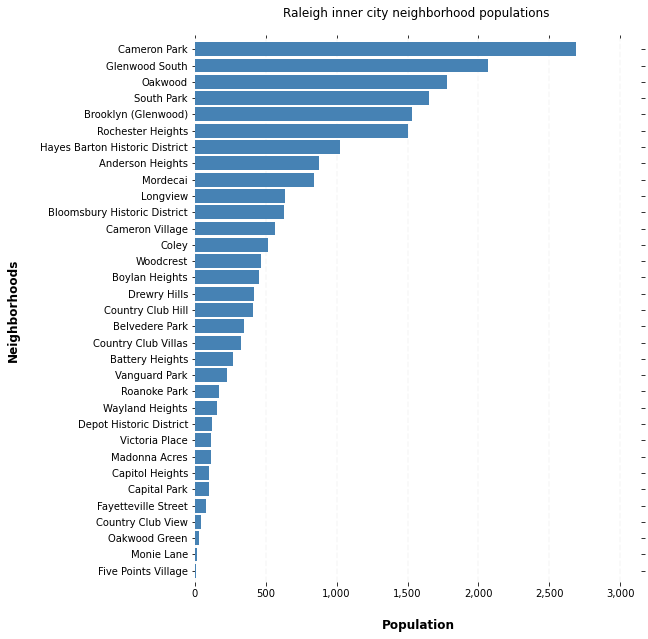

In [57]:
barChartPlot(df_sortedByPopulation, 'Raleigh inner city neighborhood populations \n', 'Population', 'Neighborhoods', 'steelblue')

Look at the density data

In [44]:
neighborhoodSortedDF.sort_values(by='density', ascending=True, inplace=True)

# neighborhoods by density
df_sortedByPopulationDensity = neighborhoodSortedDF['density']
df_sortedByPopulationDensity.tail()

neighborhood
Oakwood Green         7512
Cameron Village       8403
Glenwood South        9167
Cameron Park         13526
Rochester Heights    22077
Name: density, dtype: int64

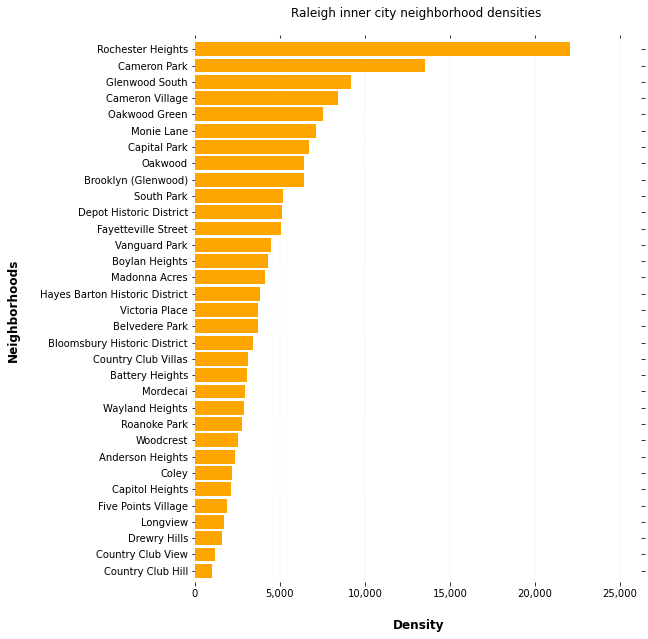

In [58]:
barChartPlot(df_sortedByPopulationDensity, 'Raleigh inner city neighborhood densities \n', 'Density', 'Neighborhoods', 'orange')

In [46]:
neighborhoodSortedDF.sort_values(by='median income', ascending=True, inplace=True)

# neighborhoods by median income
df_sortedByMedianIncome = neighborhoodSortedDF['median income']
df_sortedByMedianIncome.head()

neighborhood
Madonna Acres        23542
South Park           35558
Monie Lane           35878
Country Club View    36854
Battery Heights      39899
Name: median income, dtype: int64

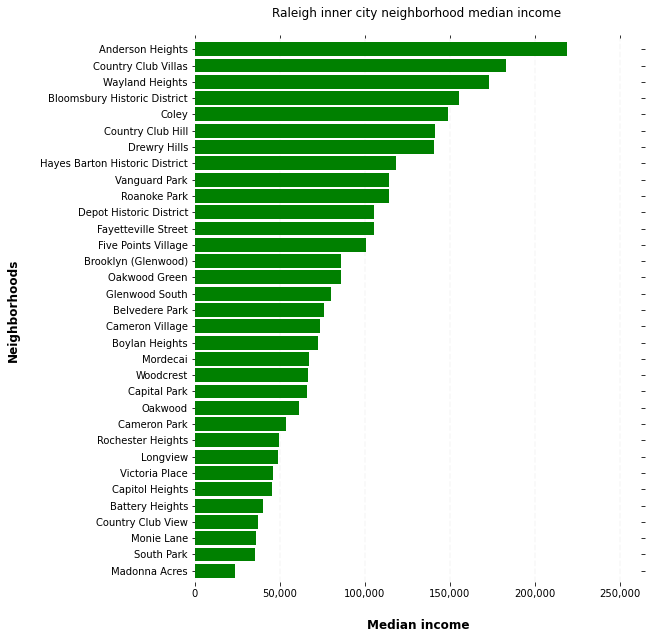

In [59]:
barChartPlot(df_sortedByMedianIncome, 'Raleigh inner city neighborhood median income \n', 'Median income', 'Neighborhoods', 'green')


### Combine the data to understand the effect of these three attributes.

Drop the area and average household size since they did not end up of interest.

In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalizedDF = neighborhoodSortedDF.drop('area', axis=1)
normalizedDF.drop('average household size', axis=1, inplace=True) 
normalizedDF.head()



,population,density,median income
neighborhood,,,
Madonna Acres,110,4095,23542
South Park,1652,5187,35558
Monie Lane,14,7124,35878
Country Club View,40,1199,36854
Battery Heights,267,3052,39899


Normalize the data so that we can stack all three statistics to see the total effect on the neighborhood.

In [50]:
normalizedDF[['population', 'density', 'median income']] = min_max_scaler.fit_transform(neighborhoodSortedDF[['population', 'density', 'median income']])
normalizedDF.columns = ['population', 'density', 'income']
normalizedDF.head()

,population,density,income
neighborhood,,,
Madonna Acres,0.038748,0.146640,0.000000
South Park,0.613264,0.198462,0.061491
Monie Lane,0.002981,0.290385,0.063128
Country Club View,0.012668,0.009207,0.068123
Battery Heights,0.097243,0.097143,0.083706


Create a total column which is a sum of the other columns.  Use this as the column to sort on.

In [51]:
normalizedDF['total'] = normalizedDF.population + normalizedDF.density + normalizedDF.income 
normalizedDF.sort_values(by='total', ascending=True, inplace=True)
normalizedDF

,population,density,income,total
neighborhood,,,,
Country Club View,0.012668,0.009207,0.068123,0.089997
Madonna Acres,0.038748,0.146640,0.000000,0.185388
Capitol Heights,0.034277,0.053578,0.110301,0.198156
Battery Heights,0.097243,0.097143,0.083706,0.278092
Victoria Place,0.040611,0.129319,0.114610,0.284539
Monie Lane,0.002981,0.290385,0.063128,0.356494
Longview,0.235097,0.034453,0.128713,0.398264
Five Points Village,0.000000,0.040955,0.393959,0.434914
Woodcrest,0.172131,0.073320,0.219235,0.464687


Now, drop the total column for the stack barchart, but save a copy because we will need the weighted total for the map later.

In [52]:
normalizedDFStack = normalizedDF.drop('total', axis=1)
normalizedDFStack

,population,density,income
neighborhood,,,
Country Club View,0.012668,0.009207,0.068123
Madonna Acres,0.038748,0.146640,0.000000
Capitol Heights,0.034277,0.053578,0.110301
Battery Heights,0.097243,0.097143,0.083706
Victoria Place,0.040611,0.129319,0.114610
Monie Lane,0.002981,0.290385,0.063128
Longview,0.235097,0.034453,0.128713
Five Points Village,0.000000,0.040955,0.393959
Woodcrest,0.172131,0.073320,0.219235


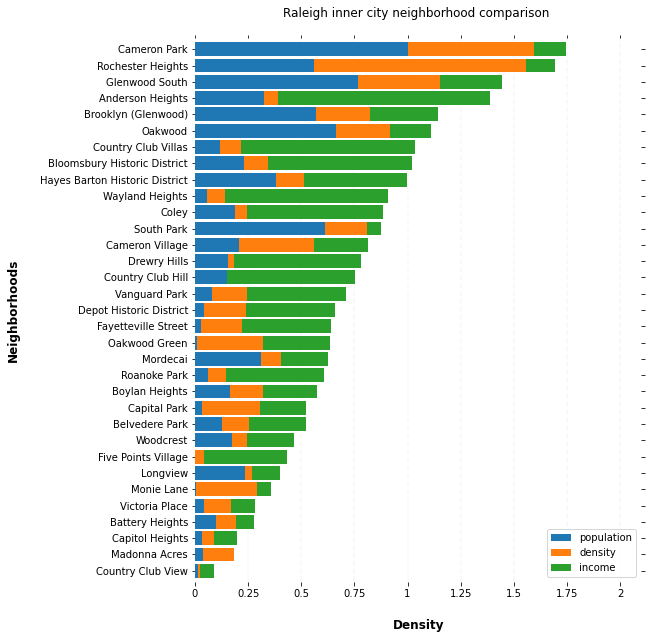

In [60]:
ax = normalizedDFStack.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.85, stacked=True)

plt.title('Raleigh inner city neighborhood comparison \n') # add title to the plot

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Density", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Neighborhoods", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

### Plot the top 6 neighborhoods

Let's take the top six of these neighborhoods and add them to the map. I am going to plot a circle near the center of the neighborhood using coordinates obtained manually on nominatim.openstreetmap.org. 

- https://nominatim.openstreetmap.org/search.php?q=cameron+park+raleigh+NC&polygon_geojson=1&format=json
- https://nominatim.openstreetmap.org/search.php?q=rochester+heights+raleigh+NC&polygon_geojson=1&format=json
- https://nominatim.openstreetmap.org/search.php?q=glenwood+south+raleigh+NC&polygon_geojson=1&format=json
- https://nominatim.openstreetmap.org/search.php?q=anderson+heights+raleigh+NC&polygon_geojson=1&format=json
- https://nominatim.openstreetmap.org/search.php?q=brooklyn+glenwood+raleigh+NC&polygon_geojson=1&format=json
- https://nominatim.openstreetmap.org/search.php?q=oakwood+raleigh+NC&polygon_geojson=1&format=json


- Cameron Park: 35.7857786,-78.65547039096172
- Rochester Heights: 35.7547137, -78.62788457128264
- Glenwood South: 35.7854358, -78.6473542
- Anderson Heights: 35.8178634, -78.63778241964707
- Brooklyn (Glenwood) - 35.7894949, -78.64934658206332
- Oakwood - 35.78484245, -78.6320285871694

In [55]:
latLongData = [['Cameron Park', 35.7857786, -78.65547039096172], ['Rochester Heights', 35.7547137, -78.62788457128264], 
               ['Glenwood South', 35.7854358, -78.6473542], ['Anderson Heights', 35.8178634, -78.63778241964707], 
               ['Brooklyn (Glenwood)', 35.7894949, -78.64934658206332], ['Oakwood', 35.78484245, -78.6320285871694]]

top6DF = pd.DataFrame(latLongData, columns = ['neighborhood', 'lat', 'lng'])
top6DF.set_index("neighborhood", inplace=True)

# add the normalized weight for each of these neighborhoods to the data frame so that we can make the dots sized proportionally 
top6DF['total'] = normalizedDF['total']
top6DF

,lat,lng,total
neighborhood,,,
Cameron Park,35.785779,-78.655470,1.747268
Rochester Heights,35.754714,-78.627885,1.691601
Glenwood South,35.785436,-78.647354,1.442660
Anderson Heights,35.817863,-78.637782,1.389246
Brooklyn (Glenwood),35.789495,-78.649347,1.142476
Oakwood,35.784842,-78.632029,1.112782


In [56]:
# add the neighborhoods as orange circle markers using the 'total' as the marker size scale.
for lat, lng, label, scale in zip(top6DF.lat, top6DF.lng, top6DF.index, top6DF.total):
    folium.CircleMarker(
        [lat, lng],
        radius=10*scale,
        color='orange',
        popup=html.escape(label),
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Conclusion

Using the venue location for exisitng bike shops and the neighborhood population data, the area between Cameron Park and Glenwood South neighborhoods looks like a great place to investigate further to see if there is room for another bike shop! 